<a href="https://colab.research.google.com/github/rajvirvyas/NBA_Position_Analysis/blob/main/Position_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import time

Installing/Importing *py_ball* library and endpoints

In [ ]:
!pip install py_ball
import py_ball

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install nba_api
import nba_api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.2/257.2 kB 5.7 MB/s eta 0:00:00


In [ ]:
from py_ball import player, league_dash, boxscore, league_hustle, synergy
from nba_api.stats.endpoints import leaguedashplayershotlocations

In [ ]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

Data Collection

In [ ]:
#Establishing connection to stats.nba.com

HEADERS = {'Connection': 'keep-alive',
           'Host': 'stats.nba.com',
           'Origin': 'http://stats.nba.com',
           'Upgrade-Insecure-Requests': '1',
           'Referer': 'stats.nba.com',
           'x-nba-stats-origin': 'stats',
           'x-nba-stats-token': 'true',
           'Accept-Language': 'en-US,en;q=0.9',
           "X-NewRelic-ID": "VQECWF5UChAHUlNTBwgBVw==",
           'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6)' +\
                         ' AppleWebKit/537.36 (KHTML, like Gecko)' + \
                         ' Chrome/81.0.4044.129 Safari/537.36'}

Shot Location Data


In [ ]:
#Player Endpoint (no)
#LeagueDash Endpoint

players_data = leaguedashplayershotlocations.LeagueDashPlayerShotLocations(distance_range = "By Zone")
players = players_data.get_data_frames()[0]
df_shotlocation = pd.DataFrame(players)

new_column_list = []
for column in df_shotlocation.columns:
  if column[0] == "":
    new_column_list.append(column[1])
  else:
    new_column_list.append(column[0] + "_" + column[1])
    
df_shotlocation.columns = new_column_list
df_shotlocation.set_index("PLAYER_ID", inplace=True)
df_shotlocation.drop(columns=["PLAYER_NAME", "TEAM_ID", "TEAM_ABBREVIATION", "AGE", "NICKNAME"], inplace=True)
df_shotlocation.rename(columns=lambda x: "shotlocation_" + x, inplace=True)
df_shotlocation

,shotlocation_Restricted Area_FGM,shotlocation_Restricted Area_FGA,shotlocation_Restricted Area_FG_PCT,shotlocation_In The Paint (Non-RA)_FGM,shotlocation_In The Paint (Non-RA)_FGA,shotlocation_In The Paint (Non-RA)_FG_PCT,shotlocation_Mid-Range_FGM,shotlocation_Mid-Range_FGA,shotlocation_Mid-Range_FG_PCT,shotlocation_Left Corner 3_FGM,shotlocation_Left Corner 3_FGA,shotlocation_Left Corner 3_FG_PCT,shotlocation_Right Corner 3_FGM,shotlocation_Right Corner 3_FGA,shotlocation_Right Corner 3_FG_PCT,shotlocation_Above the Break 3_FGM,shotlocation_Above the Break 3_FGA,shotlocation_Above the Break 3_FG_PCT,shotlocation_Backcourt_FGM,shotlocation_Backcourt_FGA,shotlocation_Backcourt_FG_PCT,shotlocation_Corner 3_FGM,shotlocation_Corner 3_FGA,shotlocation_Corner 3_FG_PCT
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,,,,
1630639,10,17,0.588,2.0,2.0,1.000,0.0,0.0,0.000,2.0,8.0,0.250,1.0,6.0,0.167,7.0,11.0,0.636,0.0,0.0,0.0,3.0,14.0,0.214
1631260,3,6,0.500,2.0,3.0,0.667,4.0,11.0,0.364,1.0,8.0,0.125,8.0,14.0,0.571,35.0,83.0,0.422,0.0,0.0,0.0,9.0,22.0,0.409
1631100,45,68,0.662,71.0,137.0,0.518,31.0,69.0,0.449,21.0,50.0,0.420,10.0,27.0,0.370,70.0,182.0,0.385,0.0,0.0,0.0,31.0,77.0,0.403
203932,318,433,0.734,37.0,98.0,0.378,14.0,57.0,0.246,6.0,30.0,0.200,8.0,26.0,0.308,46.0,113.0,0.407,0.0,4.0,0.0,14.0,56.0,0.250
1628988,31,54,0.574,16.0,55.0,0.291,9.0,23.0,0.391,3.0,7.0,0.429,1.0,9.0,0.111,32.0,72.0,0.444,0.0,0.0,0.0,4.0,16.0,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628380,135,202,0.668,73.0,140.0,0.521,21.0,59.0,0.356,0.0,2.0,0.000,2.0,7.0,0.286,53.0,137.0,0.387,0.0,1.0,0.0,2.0,9.0,0.222
203897,298,444,0.671,55.0,125.0,0.440,116.0,275.0,0.422,22.0,42.0,0.524,15.0,36.0,0.417,167.0,466.0,0.358,0.0,0.0,0.0,37.0,78.0,0.474
1630192,89,120,0.742,3.0,9.0,0.333,1.0,2.0,0.500,2.0,10.0,0.200,4.0,14.0,0.286,11.0,39.0,0.282,0.0,2.0,0.0,6.0,24.0,0.250


Basic Stats Data (Points, Assists, Rebounds, etc)

In [ ]:
boxscorestats = league_dash.LeagueDash(headers = HEADERS, endpoint = "leaguedashplayerstats")
boxscorestats = boxscorestats.data["LeagueDashPlayerStats"]
df_boxscore = pd.DataFrame(boxscorestats)
df_boxscore.set_index("PLAYER_ID", inplace=True)

df_boxscore.drop(columns=["PLAYER_NAME", "TEAM_ID", "TEAM_ABBREVIATION", "AGE", "NICKNAME"], inplace=True)
df_boxscore.rename(columns=lambda x: "boxscorestats_ " + x, inplace=True)
df_boxscore 

,boxscorestats_ GP,boxscorestats_ W,boxscorestats_ L,boxscorestats_ W_PCT,boxscorestats_ MIN,boxscorestats_ FGM,boxscorestats_ FGA,boxscorestats_ FG_PCT,boxscorestats_ FG3M,boxscorestats_ FG3A,boxscorestats_ FG3_PCT,boxscorestats_ FTM,boxscorestats_ FTA,boxscorestats_ FT_PCT,boxscorestats_ OREB,boxscorestats_ DREB,boxscorestats_ REB,boxscorestats_ AST,boxscorestats_ TOV,boxscorestats_ STL,boxscorestats_ BLK,boxscorestats_ BLKA,boxscorestats_ PF,boxscorestats_ PFD,boxscorestats_ PTS,...,boxscorestats_ FGM_RANK,boxscorestats_ FGA_RANK,boxscorestats_ FG_PCT_RANK,boxscorestats_ FG3M_RANK,boxscorestats_ FG3A_RANK,boxscorestats_ FG3_PCT_RANK,boxscorestats_ FTM_RANK,boxscorestats_ FTA_RANK,boxscorestats_ FT_PCT_RANK,boxscorestats_ OREB_RANK,boxscorestats_ DREB_RANK,boxscorestats_ REB_RANK,boxscorestats_ AST_RANK,boxscorestats_ TOV_RANK,boxscorestats_ STL_RANK,boxscorestats_ BLK_RANK,boxscorestats_ BLKA_RANK,boxscorestats_ PF_RANK,boxscorestats_ PFD_RANK,boxscorestats_ PTS_RANK,boxscorestats_ PLUS_MINUS_RANK,boxscorestats_ NBA_FANTASY_PTS_RANK,boxscorestats_ DD2_RANK,boxscorestats_ TD3_RANK,boxscorestats_ WNBA_FANTASY_PTS_RANK
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1630639,15,5,10,0.333,7.2,1.5,2.9,0.500,0.7,1.7,0.400,0.1,0.5,0.250,0.4,1.0,1.4,0.1,0.2,0.1,0.0,0.2,0.7,0.4,3.7,...,417,438,140,302,328,85,491,428,509,373,458,453,520,497,495,491,358,475,457,429,462,482,253,39,466
1631260,35,27,8,0.771,9.9,1.5,3.6,0.424,1.3,3.0,0.419,0.1,0.1,1.000,0.2,1.1,1.3,0.6,0.3,0.2,0.0,0.0,0.9,0.1,4.4,...,411,386,378,173,216,52,499,508,1,487,445,465,428,487,478,491,498,454,518,392,309,455,253,39,436
1631100,72,34,38,0.472,19.5,3.4,7.4,0.465,1.4,3.6,0.390,0.6,0.7,0.894,0.5,1.6,2.1,1.0,0.6,0.6,0.2,0.3,1.2,0.6,8.9,...,208,199,240,148,166,117,365,403,61,327,372,377,339,382,256,372,268,394,422,217,169,287,253,39,273
203932,68,45,23,0.662,30.2,6.3,11.2,0.564,0.9,2.5,0.347,2.8,4.6,0.608,2.4,4.1,6.6,3.0,1.4,0.8,0.8,1.0,1.9,3.6,16.3,...,75,106,68,244,244,259,72,48,455,24,90,56,121,144,151,65,32,205,58,82,4,77,56,39,89
1628988,63,32,31,0.508,13.4,1.5,3.5,0.418,0.6,1.4,0.409,0.4,0.5,0.844,0.4,0.8,1.2,1.4,0.6,0.6,0.2,0.3,1.3,0.8,3.9,...,418,401,399,325,359,66,416,434,129,378,486,477,260,387,251,345,315,377,356,415,212,413,253,39,416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628380,63,20,43,0.317,22.9,4.5,8.7,0.518,0.9,2.3,0.374,1.7,2.3,0.761,1.8,4.5,6.4,2.9,2.0,0.6,0.8,0.6,3.2,2.3,11.6,...,132,153,120,245,273,164,146,152,274,57,74,65,129,73,251,63,123,19,113,142,486,130,70,39,131
203897,77,38,39,0.494,35.9,8.7,18.0,0.485,2.6,7.1,0.375,4.7,5.6,0.848,0.5,3.9,4.5,4.2,2.5,0.9,0.2,1.0,2.1,3.8,24.8,...,24,25,190,30,30,159,26,28,123,316,103,140,74,43,116,305,27,167,47,21,216,44,155,39,33
1630192,53,34,19,0.642,13.7,2.1,3.7,0.561,0.3,1.2,0.262,0.8,1.2,0.645,1.2,1.4,2.6,0.3,0.6,0.3,0.4,0.2,2.0,1.2,5.2,...,337,377,71,402,381,423,307,281,435,118,406,324,496,381,405,162,339,181,282,351,391,380,192,39,389


Screens Data

In [ ]:
screens_data = league_hustle.LeagueHustle(headers = HEADERS, endpoint = "leaguehustlestatsplayer", season = "2022-23")
screens_data = screens_data.data["HustleStatsPlayer"]
df_screens = pd.DataFrame(screens_data)

# Create Player: Team dictionary for filtering playtypes
player_team_dict = {}
for i in range(len(df_screens)):
  player_team_dict[df_screens.iloc[i]["PLAYER_NAME"]] = df_screens.iloc[i]["TEAM_ABBREVIATION"]


df_screens.set_index("PLAYER_ID", inplace=True)
df_screens.drop(columns=["PLAYER_NAME", "TEAM_ID", "TEAM_ABBREVIATION", "AGE"], inplace=True)
df_screens.rename(columns=lambda x: "screens_" + x, inplace=True)
df_screens

,screens_G,screens_MIN,screens_CONTESTED_SHOTS,screens_CONTESTED_SHOTS_2PT,screens_CONTESTED_SHOTS_3PT,screens_DEFLECTIONS,screens_CHARGES_DRAWN,screens_SCREEN_ASSISTS,screens_SCREEN_AST_PTS,screens_OFF_LOOSE_BALLS_RECOVERED,screens_DEF_LOOSE_BALLS_RECOVERED,screens_LOOSE_BALLS_RECOVERED,screens_PCT_LOOSE_BALLS_RECOVERED_OFF,screens_PCT_LOOSE_BALLS_RECOVERED_DEF,screens_OFF_BOXOUTS,screens_DEF_BOXOUTS,screens_BOX_OUTS,screens_BOX_OUT_PLAYER_TEAM_REBS,screens_BOX_OUT_PLAYER_REBS,screens_PCT_BOX_OUTS_OFF,screens_PCT_BOX_OUTS_DEF,screens_PCT_BOX_OUTS_TEAM_REB,screens_PCT_BOX_OUTS_REB
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,,,
1630639,15,7.2,0.93,0.47,0.47,0.33,0.00,0.07,0.13,0.00,0.07,0.07,0.000,1.000,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000
1631260,35,9.9,1.31,0.57,0.74,0.23,0.03,0.14,0.37,0.03,0.11,0.14,0.200,0.800,0.00,0.11,0.11,0.11,0.06,0.000,1.000,1.000,0.500
1631100,72,19.5,2.89,1.42,1.47,0.88,0.00,0.17,0.39,0.19,0.22,0.42,0.467,0.533,0.00,0.08,0.08,0.08,0.03,0.000,1.000,1.000,0.333
203932,68,30.2,5.53,3.96,1.57,1.16,0.01,0.87,2.12,0.38,0.34,0.72,0.531,0.469,0.18,0.25,0.43,0.41,0.31,0.414,0.586,0.966,0.724
1628988,63,13.4,1.86,0.94,0.92,1.11,0.00,0.03,0.06,0.13,0.16,0.29,0.444,0.556,0.00,0.14,0.14,0.14,0.03,0.000,1.000,1.000,0.222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628380,63,22.9,10.14,8.67,1.48,0.94,0.06,3.29,7.16,0.19,0.19,0.38,0.500,0.500,0.27,1.29,1.56,1.41,0.78,0.173,0.827,0.967,0.533
203897,77,35.9,5.68,2.44,3.23,1.25,0.00,0.32,0.65,0.32,0.16,0.48,0.676,0.324,0.00,0.19,0.19,0.18,0.09,0.000,1.000,0.933,0.467
1630192,53,13.7,3.79,2.70,1.09,0.57,0.00,1.09,2.55,0.13,0.06,0.19,0.700,0.300,0.23,0.32,0.55,0.45,0.23,0.414,0.586,0.960,0.480


Playtype Data

In [ ]:
df_playtype = pd.DataFrame()
playtype_types = ['Cut', 'Handoff', 'Isolation', 'Misc', 'OffScreen', 'Postup', 'PRBallHandler', 'PRRollman', 'OffRebound', 'Spotup', 'Transition']
playtype_types_test = ['Cut']
for i in playtype_types:
  playtype_data = synergy.Synergy(headers = HEADERS, endpoint = "synergyplaytypes", play_type = i)
  playtype_data = playtype_data.data["SynergyPlayType"]
  df_playtype_ = pd.DataFrame(playtype_data)

  temp_bool_mask = []
  for j in range(len(df_playtype_)):
    if (df_playtype_.iloc[j]["PLAYER_NAME"] in player_team_dict.keys()) and (df_playtype_.iloc[j]["TEAM_ABBREVIATION"] == player_team_dict[df_playtype_.iloc[j]["PLAYER_NAME"]]):
      temp_bool_mask.append(True)
    else:
      temp_bool_mask.append(False)
  df_playtype_filtered = df_playtype_.copy()[temp_bool_mask]

  df_playtype_filtered.set_index("PLAYER_ID", inplace=True)
  # print("Before Merge, the size of the micro df is: " + str(len(df_playtype_)))
  df_playtype_filtered.drop(columns=["PLAYER_NAME", "SEASON_ID", "TEAM_NAME", "TEAM_ID","TEAM_ABBREVIATION", "PLAY_TYPE", "TYPE_GROUPING"], inplace=True)
  df_playtype_filtered.rename(columns=lambda x: i + "_" + x, inplace=True)

  if df_playtype.empty:
    df_playtype = df_playtype_filtered
    # print("After Merge the size of the bigass df is: " + str(len(df_playtype)))
  else:
    df_playtype = pd.merge(df_playtype, df_playtype_filtered, on="PLAYER_ID", how="outer", suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')
    # print("After Merge, the size of the bigass df is: " + str(len(df_playtype)))
  time.sleep(0.5)

df_playtype

,Cut_PERCENTILE,Cut_GP,Cut_POSS_PCT,Cut_PPP,Cut_FG_PCT,Cut_FT_POSS_PCT,Cut_TOV_POSS_PCT,Cut_SF_POSS_PCT,Cut_PLUSONE_POSS_PCT,Cut_SCORE_POSS_PCT,Cut_EFG_PCT,Cut_POSS,Cut_PTS,Cut_FGM,Cut_FGA,Cut_FGMX,Handoff_PERCENTILE,Handoff_GP,Handoff_POSS_PCT,Handoff_PPP,Handoff_FG_PCT,Handoff_FT_POSS_PCT,Handoff_TOV_POSS_PCT,Handoff_SF_POSS_PCT,Handoff_PLUSONE_POSS_PCT,...,Spotup_SF_POSS_PCT,Spotup_PLUSONE_POSS_PCT,Spotup_SCORE_POSS_PCT,Spotup_EFG_PCT,Spotup_POSS,Spotup_PTS,Spotup_FGM,Spotup_FGA,Spotup_FGMX,Transition_PERCENTILE,Transition_GP,Transition_POSS_PCT,Transition_PPP,Transition_FG_PCT,Transition_FT_POSS_PCT,Transition_TOV_POSS_PCT,Transition_SF_POSS_PCT,Transition_PLUSONE_POSS_PCT,Transition_SCORE_POSS_PCT,Transition_EFG_PCT,Transition_POSS,Transition_PTS,Transition_FGM,Transition_FGA,Transition_FGMX
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1627734,0.530,79.0,0.216,1.316,0.696,0.204,0.092,0.197,0.034,0.677,0.696,3.7,4.9,1.9,2.7,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.088,0.032,0.512,0.623,1.6,1.9,0.7,1.4,0.7,0.225,79.0,0.136,0.989,0.62,0.220,0.247,0.204,0.043,0.511,0.631,2.4,2.3,0.8,1.4,0.5
1630596,0.843,79.0,0.207,1.472,0.734,0.150,0.024,0.150,0.051,0.736,0.734,3.2,4.7,2.1,2.8,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.062,0.011,0.266,0.317,2.2,1.4,0.5,1.8,1.3,0.653,79.0,0.119,1.199,0.70,0.130,0.144,0.116,0.041,0.610,0.696,1.8,2.2,1.0,1.4,0.4
1628386,0.655,68.0,0.325,1.382,0.712,0.154,0.045,0.150,0.037,0.697,0.712,3.9,5.4,2.3,3.3,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.091,0.000,0.182,0.059,0.3,0.1,0.0,0.3,0.2,0.977,68.0,0.089,1.562,0.80,0.096,0.041,0.096,0.014,0.781,0.797,1.1,1.7,0.7,0.9,0.2
203497,0.687,70.0,0.286,1.389,0.716,0.226,0.064,0.222,0.073,0.697,0.716,3.3,4.6,1.9,2.6,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.148,0.074,0.259,0.333,0.4,0.2,0.1,0.3,0.2,0.879,70.0,0.084,1.362,0.79,0.261,0.130,0.261,0.072,0.710,0.787,1.0,1.3,0.5,0.7,0.1
1629651,0.519,76.0,0.307,1.310,0.694,0.136,0.054,0.136,0.041,0.669,0.694,3.2,4.2,1.9,2.7,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.244,0.073,0.634,0.613,0.5,0.6,0.3,0.4,0.2,0.889,76.0,0.150,1.381,0.80,0.186,0.068,0.186,0.034,0.720,0.802,1.6,2.1,1.0,1.2,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.077,0.000,0.385,0.455,2.6,2.4,0.8,2.2,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1631303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,0.000,0.300,0.450,2.5,2.3,0.8,2.5,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1630225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,0.000,0.143,0.192,2.3,0.8,0.3,2.2,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Touch Time Data

In [ ]:
touches = league_dash.LeagueDash(headers = HEADERS, endpoint = 'leaguedashptstats', season = "2022-23", player_or_team = "Player", pt_measure_type = "Possessions")
touches_data = touches.data["LeagueDashPtStats"]
df_touches = pd.DataFrame(touches_data)
df_touches.set_index("PLAYER_ID", inplace=True)
df_touches.drop(columns=["PLAYER_NAME", "TEAM_ID", "TEAM_ABBREVIATION"], inplace=True)
df_touches.rename(columns=lambda x: "touches_" + x, inplace=True)
df_touches

,touches_GP,touches_W,touches_L,touches_MIN,touches_POINTS,touches_TOUCHES,touches_FRONT_CT_TOUCHES,touches_TIME_OF_POSS,touches_AVG_SEC_PER_TOUCH,touches_AVG_DRIB_PER_TOUCH,touches_PTS_PER_TOUCH,touches_ELBOW_TOUCHES,touches_POST_TOUCHES,touches_PAINT_TOUCHES,touches_PTS_PER_ELBOW_TOUCH,touches_PTS_PER_POST_TOUCH,touches_PTS_PER_PAINT_TOUCH
PLAYER_ID,,,,,,,,,,,,,,,,,
1630639,15,5,10,7.2,3.7,9.8,5.9,0.2,1.44,0.75,0.381,0.1,0.0,0.6,2.000,0.000,1.444
1631260,35,27,8,9.9,4.4,12.1,7.4,0.5,2.53,1.74,0.364,0.1,0.0,0.3,0.000,0.000,0.667
1631100,72,34,38,19.5,8.9,21.1,14.2,0.7,2.09,1.51,0.421,0.4,0.0,0.7,0.806,2.000,0.940
203932,68,45,23,30.2,16.3,42.5,23.9,2.1,2.95,2.10,0.384,1.8,2.2,6.7,0.479,0.707,1.179
1628988,63,32,31,13.4,3.9,20.5,8.0,1.4,4.21,3.87,0.191,0.1,0.0,0.4,0.250,0.000,0.609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628380,61,19,42,22.9,11.6,38.3,26.4,1.2,1.83,0.64,0.303,4.1,3.1,5.1,0.506,0.733,0.849
203897,76,37,39,36.0,24.8,61.9,32.4,4.4,4.23,3.50,0.400,0.6,0.2,0.9,0.714,0.462,1.235
1630192,52,34,18,14.0,5.3,13.6,9.4,0.3,1.53,0.41,0.391,1.2,0.5,3.0,0.452,0.833,1.044


Extra Tracking Data (DREB%, etc)

In [ ]:
df_tracking = pd.DataFrame()
tracking_types = ["SpeedDistance", "Drives", "Defense", "CatchShoot", "Passing", "Possessions", "PullUpShot", "Rebounding", "Efficiency", "ElbowTouch", "PostTouch", "PaintTouch"]
for i in tracking_types:
  trackingstats = league_dash.LeagueDash(headers = HEADERS, endpoint = "leaguedashptstats", pt_measure_type = i)
  trackingstats = trackingstats.data["LeagueDashPtStats"]
  df_tracking_ = pd.DataFrame(trackingstats)
  
  df_tracking_.set_index("PLAYER_ID", inplace=True)
  df_tracking_.drop(columns=["PLAYER_NAME", "TEAM_ID", "TEAM_ABBREVIATION"], inplace=True)
  df_tracking_.rename(columns=lambda x: i + "_" + x, inplace=True)

  if df_tracking.empty:
    df_tracking = df_tracking_
  else:
    df_tracking = pd.merge(df_tracking, df_tracking_, on="PLAYER_ID", how="outer", suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

  time.sleep(0.5)

df_tracking #PLAYER_NAME, TEAM_ID, TEAM_ABBREVIATION

,SpeedDistance_GP,SpeedDistance_W,SpeedDistance_L,SpeedDistance_MIN,SpeedDistance_MIN1,SpeedDistance_DIST_FEET,SpeedDistance_DIST_MILES,SpeedDistance_DIST_MILES_OFF,SpeedDistance_DIST_MILES_DEF,SpeedDistance_AVG_SPEED,SpeedDistance_AVG_SPEED_OFF,SpeedDistance_AVG_SPEED_DEF,Drives_GP,Drives_W,Drives_L,Drives_MIN,Drives_DRIVES,Drives_DRIVE_FGM,Drives_DRIVE_FGA,Drives_DRIVE_FG_PCT,Drives_DRIVE_FTM,Drives_DRIVE_FTA,Drives_DRIVE_FT_PCT,Drives_DRIVE_PTS,Drives_DRIVE_PTS_PCT,...,PostTouch_POST_TOUCH_TOV_PCT,PostTouch_POST_TOUCH_FOULS,PostTouch_POST_TOUCH_FOULS_PCT,PaintTouch_GP,PaintTouch_W,PaintTouch_L,PaintTouch_MIN,PaintTouch_TOUCHES,PaintTouch_PAINT_TOUCHES,PaintTouch_PAINT_TOUCH_FGM,PaintTouch_PAINT_TOUCH_FGA,PaintTouch_PAINT_TOUCH_FG_PCT,PaintTouch_PAINT_TOUCH_FTM,PaintTouch_PAINT_TOUCH_FTA,PaintTouch_PAINT_TOUCH_FT_PCT,PaintTouch_PAINT_TOUCH_PTS,PaintTouch_PAINT_TOUCH_PTS_PCT,PaintTouch_PAINT_TOUCH_PASSES,PaintTouch_PAINT_TOUCH_PASSES_PCT,PaintTouch_PAINT_TOUCH_AST,PaintTouch_PAINT_TOUCH_AST_PCT,PaintTouch_PAINT_TOUCH_TOV,PaintTouch_PAINT_TOUCH_TOV_PCT,PaintTouch_PAINT_TOUCH_FOULS,PaintTouch_PAINT_TOUCH_FOULS_PCT
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1630639,15,5,10,7.22,7.22,3155.20,0.60,0.32,0.28,4.64,4.88,4.30,15,5,10,7.2,0.5,0.1,0.3,0.500,0.0,0.1,0.000,0.3,0.571,...,0.000,0.0,0.000,15,5,10,7.2,9.8,0.6,0.4,0.4,1.000,0.1,0.1,0.500,0.9,1.444,0.1,0.111,0.0,0.000,0.0,0.000,0.1,0.111
1631260,35,27,8,9.86,9.86,4053.23,0.77,0.42,0.34,4.35,4.73,3.96,35,27,8,9.9,0.4,0.0,0.1,0.500,0.0,0.0,0.000,0.1,0.154,...,0.000,0.0,0.000,35,27,8,9.9,12.1,0.3,0.1,0.1,0.600,0.1,0.1,1.000,0.2,0.667,0.1,0.333,0.0,0.083,0.0,0.083,0.0,0.083
1631100,72,34,38,19.46,19.46,8386.26,1.59,0.85,0.74,4.56,4.96,4.17,72,34,38,19.5,2.8,0.9,1.8,0.500,0.3,0.4,0.885,2.1,0.741,...,0.000,0.0,0.000,72,34,38,19.5,21.1,0.7,0.3,0.4,0.733,0.0,0.1,0.750,0.7,0.940,0.2,0.280,0.1,0.080,0.0,0.060,0.0,0.040
203932,68,45,23,30.22,30.22,11320.35,2.14,1.12,1.02,3.99,4.22,3.77,68,45,23,30.2,3.4,0.9,1.6,0.557,0.6,1.1,0.545,2.4,0.728,...,0.054,0.3,0.150,68,45,23,30.2,42.5,6.7,3.5,4.7,0.752,0.8,1.4,0.585,7.9,1.179,0.9,0.133,0.2,0.035,0.2,0.033,0.6,0.094
1628988,63,32,31,13.42,13.42,5413.90,1.03,0.52,0.50,4.27,4.35,4.18,63,32,31,13.4,3.4,0.5,1.3,0.418,0.2,0.2,0.786,1.3,0.379,...,0.000,0.0,0.000,63,32,31,13.4,20.5,0.4,0.1,0.2,0.429,0.0,0.0,1.000,0.2,0.609,0.1,0.304,0.0,0.000,0.0,0.000,0.0,0.043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628380,61,19,42,22.92,22.92,8779.36,1.66,0.90,0.77,4.05,4.39,3.71,61,19,42,22.9,1.0,0.4,0.7,0.548,0.1,0.2,0.600,0.9,0.841,...,0.073,0.3,0.089,61,19,42,22.9,38.3,5.1,1.8,2.8,0.651,0.7,0.8,0.816,4.3,0.849,1.3,0.257,0.2,0.039,0.4,0.080,0.3,0.068
203897,76,37,39,35.95,35.95,13892.74,2.63,1.41,1.22,4.11,4.53,3.72,76,37,39,36.0,10.7,2.8,5.2,0.546,2.2,2.5,0.881,8.1,0.761,...,0.077,0.0,0.077,76,37,39,36.0,61.9,0.9,0.5,0.7,0.780,0.1,0.1,1.000,1.1,1.235,0.1,0.162,0.1,0.059,0.0,0.029,0.0,0.044
1630192,52,34,18,13.97,13.97,5437.54,1.03,0.55,0.48,4.11,4.28,3.92,52,34,18,14.0,0.2,0.0,0.0,0.500,0.0,0.0,1.000,0.1,0.364,...,0.000,0.0,0.083,52,34,18,14.0,13.6,3.0,1.3,1.9,0.693,0.5,0.7,0.735,3.2,1.044,0.5,0.165,0.0,0.013,0.1,0.044,0.3,0.101


General Player Bio Stats (Height, Weight, etc.)

In [ ]:
biostats = league_dash.LeagueDash(headers = HEADERS, endpoint = "leaguedashplayerbiostats")
biostats = biostats.data["LeagueDashPlayerBioStats"]
df_biostats = pd.DataFrame(biostats)
df_biostats.set_index("PLAYER_ID", inplace=True)
df_biostats.drop(columns=["PLAYER_HEIGHT"], inplace=True)

df_biostats["PLAYER_WEIGHT"] = df_biostats["PLAYER_WEIGHT"].astype(int)

df_biostats.rename(columns=lambda x: "biostats_" + x, inplace=True)
df_biostats

,biostats_PLAYER_NAME,biostats_TEAM_ID,biostats_TEAM_ABBREVIATION,biostats_AGE,biostats_PLAYER_HEIGHT_INCHES,biostats_PLAYER_WEIGHT,biostats_COLLEGE,biostats_COUNTRY,biostats_DRAFT_YEAR,biostats_DRAFT_ROUND,biostats_DRAFT_NUMBER,biostats_GP,biostats_PTS,biostats_REB,biostats_AST,biostats_NET_RATING,biostats_OREB_PCT,biostats_DREB_PCT,biostats_USG_PCT,biostats_TS_PCT,biostats_AST_PCT
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,
1630639,A.J. Lawson,1610612742,DAL,22.0,78,179,South Carolina,Canada,Undrafted,Undrafted,Undrafted,15,3.7,1.4,0.1,-20.1,0.046,0.152,0.189,0.589,0.032
1631260,AJ Green,1610612749,MIL,23.0,77,190,Northern Iowa,USA,Undrafted,Undrafted,Undrafted,35,4.4,1.3,0.6,-4.9,0.016,0.105,0.159,0.607,0.092
1631100,AJ Griffin,1610612737,ATL,19.0,78,220,Duke,USA,2022,1,16,72,8.9,2.1,1.0,1.5,0.026,0.080,0.174,0.577,0.070
203932,Aaron Gordon,1610612743,DEN,27.0,80,235,Arizona,USA,2014,1,4,68,16.3,6.6,3.0,12.1,0.086,0.136,0.206,0.617,0.129
1628988,Aaron Holiday,1610612737,ATL,26.0,72,185,UCLA,USA,2018,1,23,63,3.9,1.2,1.4,0.9,0.028,0.059,0.129,0.528,0.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628380,Zach Collins,1610612759,SAS,25.0,83,250,Gonzaga,USA,2017,1,10,63,11.6,6.4,2.9,-7.5,0.076,0.190,0.209,0.599,0.180
203897,Zach LaVine,1610612741,CHI,28.0,77,200,UCLA,USA,2014,1,13,77,24.8,4.5,4.2,0.3,0.016,0.108,0.278,0.607,0.187
1630192,Zeke Nnaji,1610612743,DEN,22.0,81,240,Arizona,USA,2020,1,22,53,5.2,2.6,0.3,-5.9,0.087,0.099,0.149,0.620,0.040


Clutch Stats

In [ ]:
clutchstats = league_dash.LeagueDash(headers = HEADERS, endpoint = "leaguedashplayerclutch")
clutchstats = clutchstats.data["LeagueDashPlayerClutch"]
df_clutchstats = pd.DataFrame(clutchstats)
df_clutchstats.set_index("PLAYER_ID", inplace=True)
df_clutchstats.drop(columns=["GROUP_SET", "PLAYER_NAME", "TEAM_ID", "TEAM_ABBREVIATION", "AGE", "NICKNAME"], inplace=True)
df_clutchstats.rename(columns=lambda x: "clutch_" + x, inplace=True)
df_clutchstats

,clutch_GP,clutch_W,clutch_L,clutch_W_PCT,clutch_MIN,clutch_FGM,clutch_FGA,clutch_FG_PCT,clutch_FG3M,clutch_FG3A,clutch_FG3_PCT,clutch_FTM,clutch_FTA,clutch_FT_PCT,clutch_OREB,clutch_DREB,clutch_REB,clutch_AST,clutch_TOV,clutch_STL,clutch_BLK,clutch_BLKA,clutch_PF,clutch_PFD,clutch_PTS,...,clutch_FGM_RANK,clutch_FGA_RANK,clutch_FG_PCT_RANK,clutch_FG3M_RANK,clutch_FG3A_RANK,clutch_FG3_PCT_RANK,clutch_FTM_RANK,clutch_FTA_RANK,clutch_FT_PCT_RANK,clutch_OREB_RANK,clutch_DREB_RANK,clutch_REB_RANK,clutch_AST_RANK,clutch_TOV_RANK,clutch_STL_RANK,clutch_BLK_RANK,clutch_BLKA_RANK,clutch_PF_RANK,clutch_PFD_RANK,clutch_PTS_RANK,clutch_PLUS_MINUS_RANK,clutch_NBA_FANTASY_PTS_RANK,clutch_DD2_RANK,clutch_TD3_RANK,clutch_WNBA_FANTASY_PTS_RANK
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1631100,2,2,0,1.000,3.5,1.5,2.5,0.600,0.0,1.0,0.00,0.0,0.0,0.000,0.5,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,3.0,...,1,1,73,95,2,95,120,137,120,4,188,22,131,96,57,2,40,171,136,1,1,2,168,21,2
203932,13,11,2,0.846,0.6,0.0,0.0,0.000,0.0,0.0,0.00,0.2,0.2,1.000,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.1,0.2,...,196,240,196,95,165,95,22,39,1,94,188,216,131,96,36,39,40,125,106,173,232,205,52,21,224
1628988,2,0,2,0.000,0.2,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,196,240,196,95,165,95,120,137,120,94,188,216,131,96,57,39,40,171,136,223,384,287,168,21,287
1630174,12,7,5,0.583,1.0,0.1,0.1,1.000,0.0,0.0,0.00,0.2,0.3,0.667,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.3,...,158,228,1,95,165,95,43,30,99,94,154,189,131,96,57,39,40,116,100,136,259,214,102,21,216
1630598,6,4,2,0.667,0.9,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.000,0.2,0.0,0.2,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,...,196,240,196,95,165,95,120,137,120,24,188,116,38,96,7,39,40,171,136,223,233,106,168,21,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628380,5,2,3,0.400,1.2,0.0,0.2,0.000,0.0,0.2,0.00,0.2,0.2,1.000,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,...,196,176,196,95,59,95,31,45,1,94,70,91,131,96,57,39,40,171,34,183,363,212,71,21,217
203897,21,10,11,0.476,1.6,0.3,0.6,0.462,0.0,0.2,0.25,0.1,0.2,0.750,0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.1,0.0,0.1,0.8,...,52,47,123,90,70,84,52,56,94,91,187,181,90,48,57,39,13,165,54,56,330,111,102,21,76
1630192,3,0,3,0.000,0.1,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,196,240,196,95,165,95,120,137,120,94,188,216,131,96,57,39,40,171,136,223,305,287,102,21,287


Merging Data Together (By Player ID)

In [ ]:
df_all_data = pd.DataFrame()

df_all_data = df_shotlocation
df_all_data = pd.merge(df_all_data, df_boxscore, on="PLAYER_ID", how="outer")
df_all_data = pd.merge(df_all_data, df_screens, on="PLAYER_ID", how="outer")
df_all_data = pd.merge(df_all_data, df_touches, on="PLAYER_ID", how="outer")
df_all_data = pd.merge(df_all_data, df_biostats, on="PLAYER_ID", how="outer")
df_all_data = pd.merge(df_all_data, df_tracking, on="PLAYER_ID", how="outer")
df_all_data = pd.merge(df_all_data, df_clutchstats, on="PLAYER_ID", how="outer")
df_all_data = pd.merge(df_all_data, df_playtype, on="PLAYER_ID", how="outer")
df_all_data.fillna(0, inplace=True)
df_all_data

,shotlocation_Restricted Area_FGM,shotlocation_Restricted Area_FGA,shotlocation_Restricted Area_FG_PCT,shotlocation_In The Paint (Non-RA)_FGM,shotlocation_In The Paint (Non-RA)_FGA,shotlocation_In The Paint (Non-RA)_FG_PCT,shotlocation_Mid-Range_FGM,shotlocation_Mid-Range_FGA,shotlocation_Mid-Range_FG_PCT,shotlocation_Left Corner 3_FGM,shotlocation_Left Corner 3_FGA,shotlocation_Left Corner 3_FG_PCT,shotlocation_Right Corner 3_FGM,shotlocation_Right Corner 3_FGA,shotlocation_Right Corner 3_FG_PCT,shotlocation_Above the Break 3_FGM,shotlocation_Above the Break 3_FGA,shotlocation_Above the Break 3_FG_PCT,shotlocation_Backcourt_FGM,shotlocation_Backcourt_FGA,shotlocation_Backcourt_FG_PCT,shotlocation_Corner 3_FGM,shotlocation_Corner 3_FGA,shotlocation_Corner 3_FG_PCT,boxscorestats_ GP,...,Spotup_SF_POSS_PCT,Spotup_PLUSONE_POSS_PCT,Spotup_SCORE_POSS_PCT,Spotup_EFG_PCT,Spotup_POSS,Spotup_PTS,Spotup_FGM,Spotup_FGA,Spotup_FGMX,Transition_PERCENTILE,Transition_GP,Transition_POSS_PCT,Transition_PPP,Transition_FG_PCT,Transition_FT_POSS_PCT,Transition_TOV_POSS_PCT,Transition_SF_POSS_PCT,Transition_PLUSONE_POSS_PCT,Transition_SCORE_POSS_PCT,Transition_EFG_PCT,Transition_POSS,Transition_PTS,Transition_FGM,Transition_FGA,Transition_FGMX
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1630639,10,17,0.588,2.0,2.0,1.000,0.0,0.0,0.000,2.0,8.0,0.250,1.0,6.0,0.167,7.0,11.0,0.636,0.0,0.0,0.0,3.0,14.0,0.214,15,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
1631260,3,6,0.500,2.0,3.0,0.667,4.0,11.0,0.364,1.0,8.0,0.125,8.0,14.0,0.571,35.0,83.0,0.422,0.0,0.0,0.0,9.0,22.0,0.409,35,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
1631100,45,68,0.662,71.0,137.0,0.518,31.0,69.0,0.449,21.0,50.0,0.420,10.0,27.0,0.370,70.0,182.0,0.385,0.0,0.0,0.0,31.0,77.0,0.403,72,...,0.021,0.000,0.424,0.558,3.3,3.6,1.3,3.1,1.8,0.447,72.0,0.169,1.099,0.46,0.059,0.059,0.050,0.020,0.455,0.555,1.4,1.5,0.6,1.3,0.7
203932,318,433,0.734,37.0,98.0,0.378,14.0,57.0,0.246,6.0,30.0,0.200,8.0,26.0,0.308,46.0,113.0,0.407,0.0,4.0,0.0,14.0,56.0,0.250,68,...,0.031,0.000,0.347,0.457,1.4,1.3,0.5,1.4,0.9,0.635,68.0,0.191,1.188,0.57,0.183,0.110,0.168,0.042,0.555,0.651,2.8,3.3,1.2,2.1,0.9
1628988,31,54,0.574,16.0,55.0,0.291,9.0,23.0,0.391,3.0,7.0,0.429,1.0,9.0,0.111,32.0,72.0,0.444,0.0,0.0,0.0,4.0,16.0,0.250,63,...,0.032,0.000,0.387,0.518,1.5,1.4,0.5,1.3,0.8,0.046,63.0,0.145,0.744,0.34,0.077,0.154,0.077,0.051,0.308,0.406,0.6,0.5,0.2,0.5,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628380,135,202,0.668,73.0,140.0,0.521,21.0,59.0,0.356,0.0,2.0,0.000,2.0,7.0,0.286,53.0,137.0,0.387,0.0,1.0,0.0,2.0,9.0,0.222,63,...,0.038,0.000,0.404,0.538,1.7,1.7,0.6,1.5,0.9,0.715,63.0,0.053,1.231,0.65,0.077,0.154,0.077,0.026,0.564,0.726,0.6,0.8,0.3,0.5,0.2
203897,298,444,0.671,55.0,125.0,0.440,116.0,275.0,0.422,22.0,42.0,0.524,15.0,36.0,0.417,167.0,466.0,0.358,0.0,0.0,0.0,37.0,78.0,0.474,77,...,0.098,0.020,0.498,0.644,3.9,4.7,1.6,3.2,1.6,0.727,77.0,0.198,1.236,0.59,0.193,0.103,0.193,0.040,0.583,0.641,4.5,5.6,2.0,3.3,1.4
1630192,89,120,0.742,3.0,9.0,0.333,1.0,2.0,0.500,2.0,10.0,0.200,4.0,14.0,0.286,11.0,39.0,0.282,0.0,2.0,0.0,6.0,24.0,0.250,53,...,0.000,0.000,0.261,0.398,0.9,0.7,0.2,0.8,0.6,0.925,53.0,0.121,1.419,0.73,0.097,0.097,0.097,0.032,0.677,0.769,0.6,0.8,0.4,0.5,0.1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

corr_matrix = df_all_data.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

df_all_data.drop(to_drop, axis=1, inplace=True)
df_all_data

<ipython-input-17-94b890240b65>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_all_data.corr().abs()


,shotlocation_Restricted Area_FGM,shotlocation_Restricted Area_FG_PCT,shotlocation_In The Paint (Non-RA)_FG_PCT,shotlocation_Mid-Range_FG_PCT,shotlocation_Left Corner 3_FGM,shotlocation_Left Corner 3_FG_PCT,shotlocation_Right Corner 3_FG_PCT,shotlocation_Above the Break 3_FGM,shotlocation_Above the Break 3_FG_PCT,shotlocation_Backcourt_FGM,shotlocation_Backcourt_FGA,boxscorestats_ GP,boxscorestats_ W_PCT,boxscorestats_ FG_PCT,boxscorestats_ FT_PCT,boxscorestats_ OREB,boxscorestats_ BLK,boxscorestats_ PLUS_MINUS,boxscorestats_ TD3,boxscorestats_ TD3_RANK,screens_CHARGES_DRAWN,screens_PCT_LOOSE_BALLS_RECOVERED_OFF,screens_PCT_LOOSE_BALLS_RECOVERED_DEF,screens_PCT_BOX_OUTS_OFF,screens_PCT_BOX_OUTS_DEF,...,Handoff_PLUSONE_POSS_PCT,Isolation_PERCENTILE,Misc_PERCENTILE,Misc_POSS_PCT,Misc_SF_POSS_PCT,Misc_PLUSONE_POSS_PCT,OffScreen_PERCENTILE,OffScreen_POSS_PCT,OffScreen_FT_POSS_PCT,OffScreen_PLUSONE_POSS_PCT,Postup_PERCENTILE,PRBallHandler_PERCENTILE,PRRollman_PERCENTILE,PRRollman_TOV_POSS_PCT,OffRebound_PERCENTILE,OffRebound_TOV_POSS_PCT,OffRebound_PLUSONE_POSS_PCT,Spotup_PERCENTILE,Spotup_POSS_PCT,Spotup_FT_POSS_PCT,Spotup_TOV_POSS_PCT,Spotup_PLUSONE_POSS_PCT,Transition_PERCENTILE,Transition_POSS_PCT,Transition_TOV_POSS_PCT
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1630639,10,0.588,1.000,0.000,2.0,0.250,0.167,7.0,0.636,0.0,0.0,15,0.333,0.500,0.250,0.4,0.0,-3.1,0,39,0.00,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1631260,3,0.500,0.667,0.364,1.0,0.125,0.571,35.0,0.422,0.0,0.0,35,0.771,0.424,1.000,0.2,0.0,-0.7,0,39,0.03,0.200,0.800,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1631100,45,0.662,0.518,0.449,21.0,0.420,0.370,70.0,0.385,0.0,0.0,72,0.472,0.465,0.894,0.5,0.2,0.9,0,39,0.00,0.467,0.533,0.000,1.000,...,0.000,0.783,0.470,0.027,0.063,0.000,0.493,0.156,0.032,0.000,0.000,0.677,0.000,0.000,0.976,0.050,0.000,0.675,0.399,0.021,0.034,0.000,0.447,0.169,0.059
203932,318,0.734,0.378,0.246,6.0,0.200,0.308,46.0,0.407,0.0,4.0,68,0.662,0.564,0.608,2.4,0.8,7.6,0,39,0.01,0.531,0.469,0.414,0.586,...,0.000,0.457,0.368,0.058,0.052,0.000,0.000,0.000,0.000,0.000,0.575,0.432,0.880,0.024,0.642,0.009,0.018,0.237,0.098,0.031,0.020,0.000,0.635,0.191,0.110
1628988,31,0.574,0.291,0.391,3.0,0.429,0.111,32.0,0.444,0.0,0.0,63,0.508,0.418,0.844,0.4,0.2,0.3,0,39,0.00,0.444,0.556,0.000,1.000,...,0.000,0.953,0.405,0.056,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.652,0.000,0.000,0.000,0.000,0.000,0.415,0.346,0.043,0.075,0.000,0.046,0.145,0.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628380,135,0.668,0.521,0.356,0.0,0.000,0.286,53.0,0.387,0.0,1.0,63,0.317,0.518,0.761,1.8,0.8,-3.8,0,39,0.06,0.500,0.500,0.173,0.827,...,0.000,0.594,0.158,0.128,0.021,0.011,0.606,0.015,0.000,0.000,0.701,0.000,0.355,0.057,0.759,0.100,0.029,0.536,0.141,0.048,0.058,0.000,0.715,0.053,0.154
203897,298,0.671,0.440,0.422,22.0,0.524,0.417,167.0,0.358,0.0,0.0,77,0.494,0.485,0.848,0.5,0.2,0.2,0,39,0.00,0.676,0.324,0.000,1.000,...,0.026,0.831,0.673,0.030,0.115,0.019,0.357,0.058,0.078,0.010,0.036,0.658,0.841,0.000,0.991,0.048,0.000,0.885,0.169,0.098,0.091,0.020,0.727,0.198,0.103
1630192,89,0.742,0.333,0.500,2.0,0.200,0.286,11.0,0.282,0.0,2.0,53,0.642,0.561,0.645,1.2,0.4,-1.8,0,39,0.00,0.700,0.300,0.414,0.586,...,0.000,0.000,0.139,0.113,0.000,0.000,0.000,0.000,0.000,0.000,0.994,0.000,0.811,0.075,0.586,0.085,0.000,0.106,0.180,0.000,0.043,0.000,0.925,0.121,0.097


In [ ]:
quantitative_features = df_all_data._get_numeric_data()
categorical_features = df_all_data.select_dtypes(include=["object"])

PLAYER_ID
1630639     10
1631260      3
1631100     45
203932     318
1628988     31
          ... 
1628380    135
203897     298
1630192     89
1630533     39
1629627    237
Name: shotlocation_Restricted Area_FGM, Length: 539, dtype: int64

In [ ]:
type(pd.get_dummies(categorical_features))

pandas.core.frame.DataFrame

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='PC_1', ylabel='PC_2'>

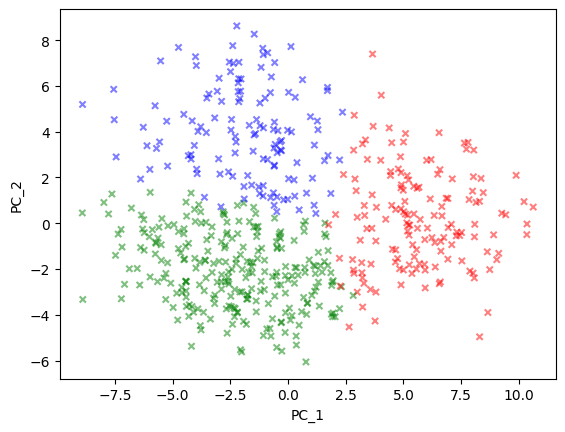

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(quantitative_features)
quantitative_features_std = scaler.transform(quantitative_features)
quantitative_features_std_df = pd.DataFrame(quantitative_features_std, columns = quantitative_features.columns, index = quantitative_features.index)

categorical_features_dummies = pd.get_dummies(categorical_features)
X_train = pd.merge(quantitative_features_std_df, categorical_features_dummies, on="PLAYER_ID", how="outer").to_numpy()
X_train

pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(X_train)
X_train_std_pca = pd.DataFrame(pca_2_result, columns=['PC_1', 'PC_2'])

model = KMeans(n_clusters=3)
model.fit(X_train)

# centroids = model.cluster_centers_
# pca_2_result_centroids = pca_2.fit_transform(centroids)
# centroids_std_pca = pd.DataFrame(pca_2_result_centroids, columns=['PC_1', 'PC_2'])

clusters = pd.Series(model.labels_).map({
    0: "r",
    1: "b",
    2: "g",
    3: "y",
    4: "m",
    5: "c"
})

df_all_data["Cluster Color"] = clusters

X_train_std_pca.plot.scatter(x="PC_1", y="PC_2", c=clusters, marker="x", alpha=.5)
# centroids_std_pca.plot.scatter(x="PC_1", y="PC_2", color="black", marker="o", alpha=.5, figsize=(8,7), s=100, ax=ax1)